# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
#匯入資料集
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

#將資料轉為Dataframe
import pandas as pd
df = pd.DataFrame(iris['data'], columns= iris['feature_names'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


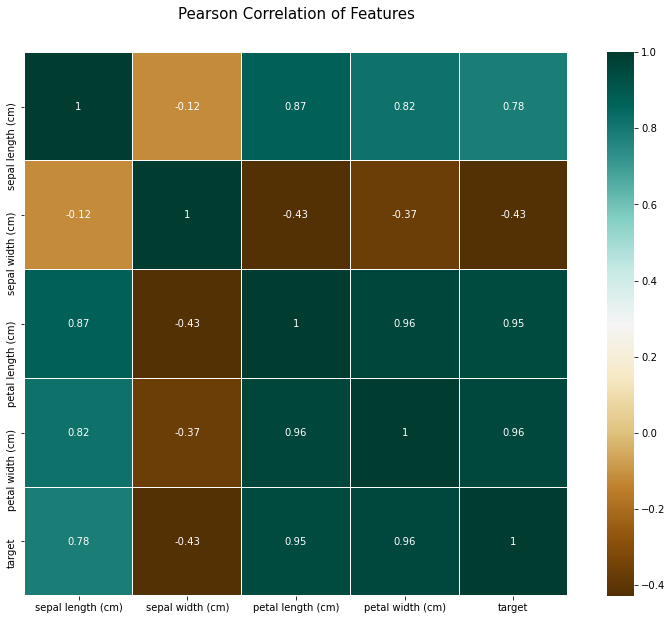

In [2]:
#EDA-以heatmap方式了解資料
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG",
            linewidths=0.1, square=True, linecolor='white',
            annot=True)

In [3]:
#切分資料集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [4]:
#訓練模型
from sklearn.cluster import KMeans

clu = KMeans(n_clusters = 3)
clu.fit(X)

KMeans(n_clusters=3)

In [5]:
#確認資料是否被分三類
clu.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [6]:
#以accuracy_score驗證模型(在非監督式學習下不是好的評分方式)
from sklearn.metrics import accuracy_score
predict = clu.predict(x_test)
print("預測標籤:", predict)
print("正確標籤:", y_test)
print("正確率:", accuracy_score(y_test, predict) * 100, "%")

預測標籤: [0 2 0 0 2 1 0 2 0 2 2 1 0 2 0 1 2 1 1 2 1 0 2 1 1 2 2 0 2 2]
正確標籤: [0 1 0 0 2 1 0 1 0 1 1 2 0 1 0 2 2 2 2 1 2 0 2 2 2 2 1 0 1 1]
正確率: 46.666666666666664 %


分數: [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3648340039670018, 0.354457992531674]
K值: [2, 3, 4, 5, 6, 7]


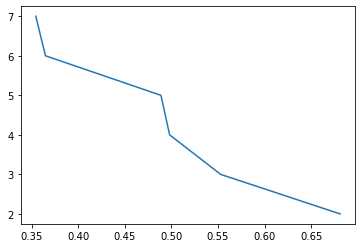

In [7]:
#以silhouette_score驗證模型
from sklearn.metrics import silhouette_score
%matplotlib inline

scores = []
ks = []

for i in range(2, 8):
    clu = KMeans(n_clusters = i)
    clu.fit(iris['data'])
    clu_score = silhouette_score(iris['data'], clu.labels_)
    scores.append(clu_score)
    ks.append(i)

print("分數:", scores)
print("K值:", ks)
plt.plot(scores, ks)
##由結果可知分2, 3類的效果最好, 以已知結果可知鳶尾花其實有3類, 故可合理推測分2類也有高分的原因是其三類中有二類相似

In [8]:
#在嘗試看看分2類
clu = KMeans(n_clusters = 2)
clu.fit(X)

KMeans(n_clusters=2)

In [9]:
clu.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
predict = clu.predict(x_test)
print("預測標籤:", predict)
print("正確標籤:", y_test)
print("正確率:", accuracy_score(y_test, predict) * 100, "%")

預測標籤: [0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1]
正確標籤: [0 1 0 0 2 1 0 1 0 1 1 2 0 1 0 2 2 2 2 1 2 0 2 2 2 2 1 0 1 1]
正確率: 63.33333333333333 %


In [11]:
#設定模型估計參數
#n_clusters:需要計算出的群集數
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              #n_init:使用不同centroid seeds運行k-means算法的時間
              #init:設定初始化方式(initial設定的不同, 會導致得到不同clustering的結果, 可能導致local optima, 而非global optima)
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

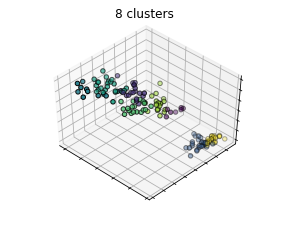

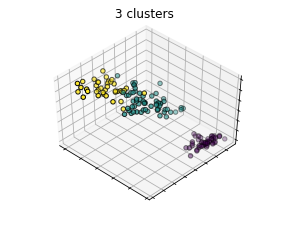

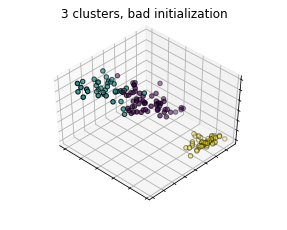

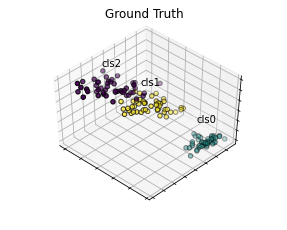

In [12]:
#程式碼參考https://machine-learning-python.kspax.io/clustering/ex10_k-means_clustering
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    #Axes3D:定義一個3D的圖形
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    #est.fit:根據上面estimators去fit資料庫的圖
    est.fit(X)
    
    labels = est.labels_
    
    #ax.scatter:畫散點圖, 後面的參數用來調整顏色
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    
    #ax.dist:設定與物體之間的距離
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    #ax.text3D:將不同label的資料標上個別物種類名稱, 裡面 X[y == label, 3].mean()用在調整text的X, Y ,Z 軸位置
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
#np.choose:將原本label順序的(0 1 2)改成(1 2 0)
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()